$$
H_a(s) = \frac{t_2}{t_1} \frac{1+st_2}{(1+st_1)(1+st_3)}
$$

$$
t_1 = 75us
$$

$$
t_2 = 318us
$$

$$
t_3 = 3180us
$$

$$
\begin{align} 
H_d(z) 
&= H_a(s) \\
&= H_a(\frac{2}{T} \frac{z-1}{z+1}) \\
\end{align} 
$$

$$
\begin{align} 
s 
&= j\omega_{a}  \\
&= j \frac{2}{T} \cdot tan(\frac{\omega_{d}T}{2}) \\
\omega _{a} &= {\frac {2}{T}} \cdot \tan({\frac{\omega _{d}T}{2}}) \\
\end{align} 
$$

In [1]:
import matplotlib.pyplot as plt
from scipy import signal, fft, interpolate
import numpy as np

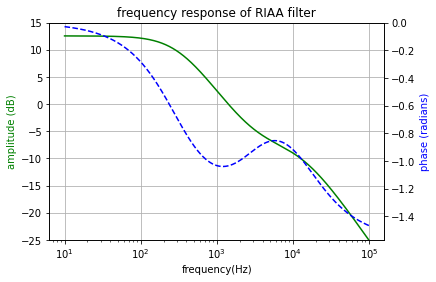

In [2]:
t1 = 75e-6
t2 = 318e-6
t3 = 3180e-6

zeros = [-1/t2]
poles = [-1/t1, -1/t3]
gain = (318e-6 / 75e-6) * t2 / (t1*t3)
ws, hs = signal.freqs_zpk(zeros, poles, gain, 16384)

amplitude = 20 * np.log10(abs(hs))
angle = np.angle(hs)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(ws, amplitude, 'g')
ax1.set_xlabel(r'frequency(Hz)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-25, 15)

ax2.plot(ws, angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')
ax2.set_ylim(-np.pi/2, 0)

ax1.grid()

plt.title('frequency response of RIAA filter')
plt.xscale("log")
plt.show()

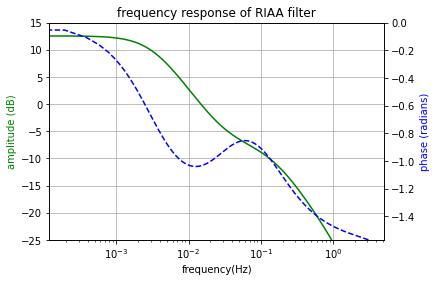

In [3]:
fs = 96000
filtz = signal.lti(*signal.bilinear_zpk(zeros, poles, gain, fs))

wz, hz = signal.freqz_zpk(filtz.zeros, filtz.poles, filtz.gain, 16384)

amplitude = 20 * np.log10(abs(hz))
angle = np.angle(hz)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(wz, amplitude, 'g')
ax1.set_xlabel(r'frequency(Hz)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-25, 15)

ax2.plot(wz, angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')
ax2.set_ylim(-np.pi/2, 0)

ax1.grid()

plt.title('frequency response of RIAA filter')
plt.xscale("log")
plt.show()

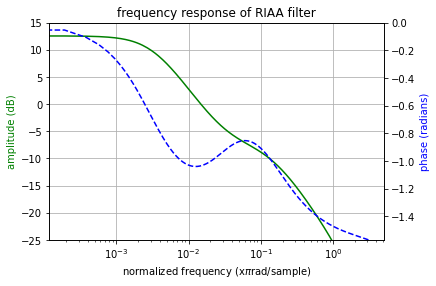

In [4]:
b0 = 1 * filtz.gain
b1 = -np.sum(filtz.zeros) * filtz.gain
b2 = np.prod(filtz.zeros) * filtz.gain

a0 = 1
a1 = -np.sum(filtz.poles)
a2 = np.prod(filtz.poles)

numerator = [b0, b1, b2]
denominator = [a0, a1, a2]
w, h = signal.freqz(numerator, denominator, worN=16384)

amplitude = 20 * np.log10(abs(h)) 
angle = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(w, amplitude, 'g')
ax1.set_xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-25, 15)

ax2.plot(w, angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')
ax2.set_ylim(-np.pi/2, 0)

ax1.grid()

plt.title('frequency response of RIAA filter')
plt.xscale("log")
plt.show()